"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [533]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as ly

In [534]:
penguin_df = pd.read_csv("https://raw.githubusercontent.com/CHAbhishek/intro_to_ml/main/penguin_actual")

In [535]:
penguin_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [536]:
penguin_df.isna().any()
penguin_df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [537]:
penguin_df["sex"][336] = np.NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [538]:
penguin_df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [539]:
list(penguin_df.columns)

['species',
 'island',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [540]:
penguin_df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [541]:
penguin_df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [542]:
def NA_removal(df):
    cols = list(df.columns)
    for col in cols:
        freq_list =  dict(penguin_df[col].value_counts())
        most_freq = list(freq_list.keys())[0]    
        for i in range(len(df[col])):
            if pd.isnull(df[col][i]) == True:
                df[col][i] = most_freq
    return df



In [543]:
penguin_df = NA_removal(penguin_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [544]:
penguin_df["sex"].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [545]:
dict(penguin_df["sex"].value_counts())

{'FEMALE': 165, 'MALE': 179}

Uisng Imputer, filling the NA values with the most frequent one

In [546]:
penguin_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [547]:
def LabelEncoding(cols):
    encoded_col = cols.unique()
    encoders = list(np.arange(0,len(encoded_col)))
    encoding_dict = dict(zip(encoded_col,encoders))
    for i in range(len(cols)):
        cols[i] = encoding_dict[cols[i]]

    return cols


In [548]:
encoding_descriptors = ["species","island","sex"]

In [549]:
for i in encoding_descriptors:
    penguin_df[i] = LabelEncoding(penguin_df[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [550]:
penguin_df["sex"]

0      0
1      1
2      1
3      0
4      1
      ..
339    0
340    1
341    0
342    1
343    0
Name: sex, Length: 344, dtype: object

Label Encoding the categorical descriptors


In [551]:
penguin_df['sex'].value_counts()

0    179
1    165
Name: sex, dtype: int64

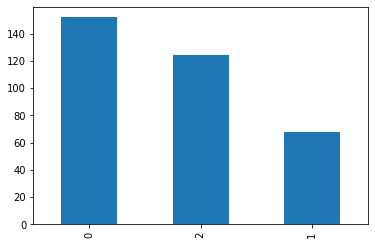

In [552]:
penguin_df['species'].value_counts().plot(kind= 'bar')

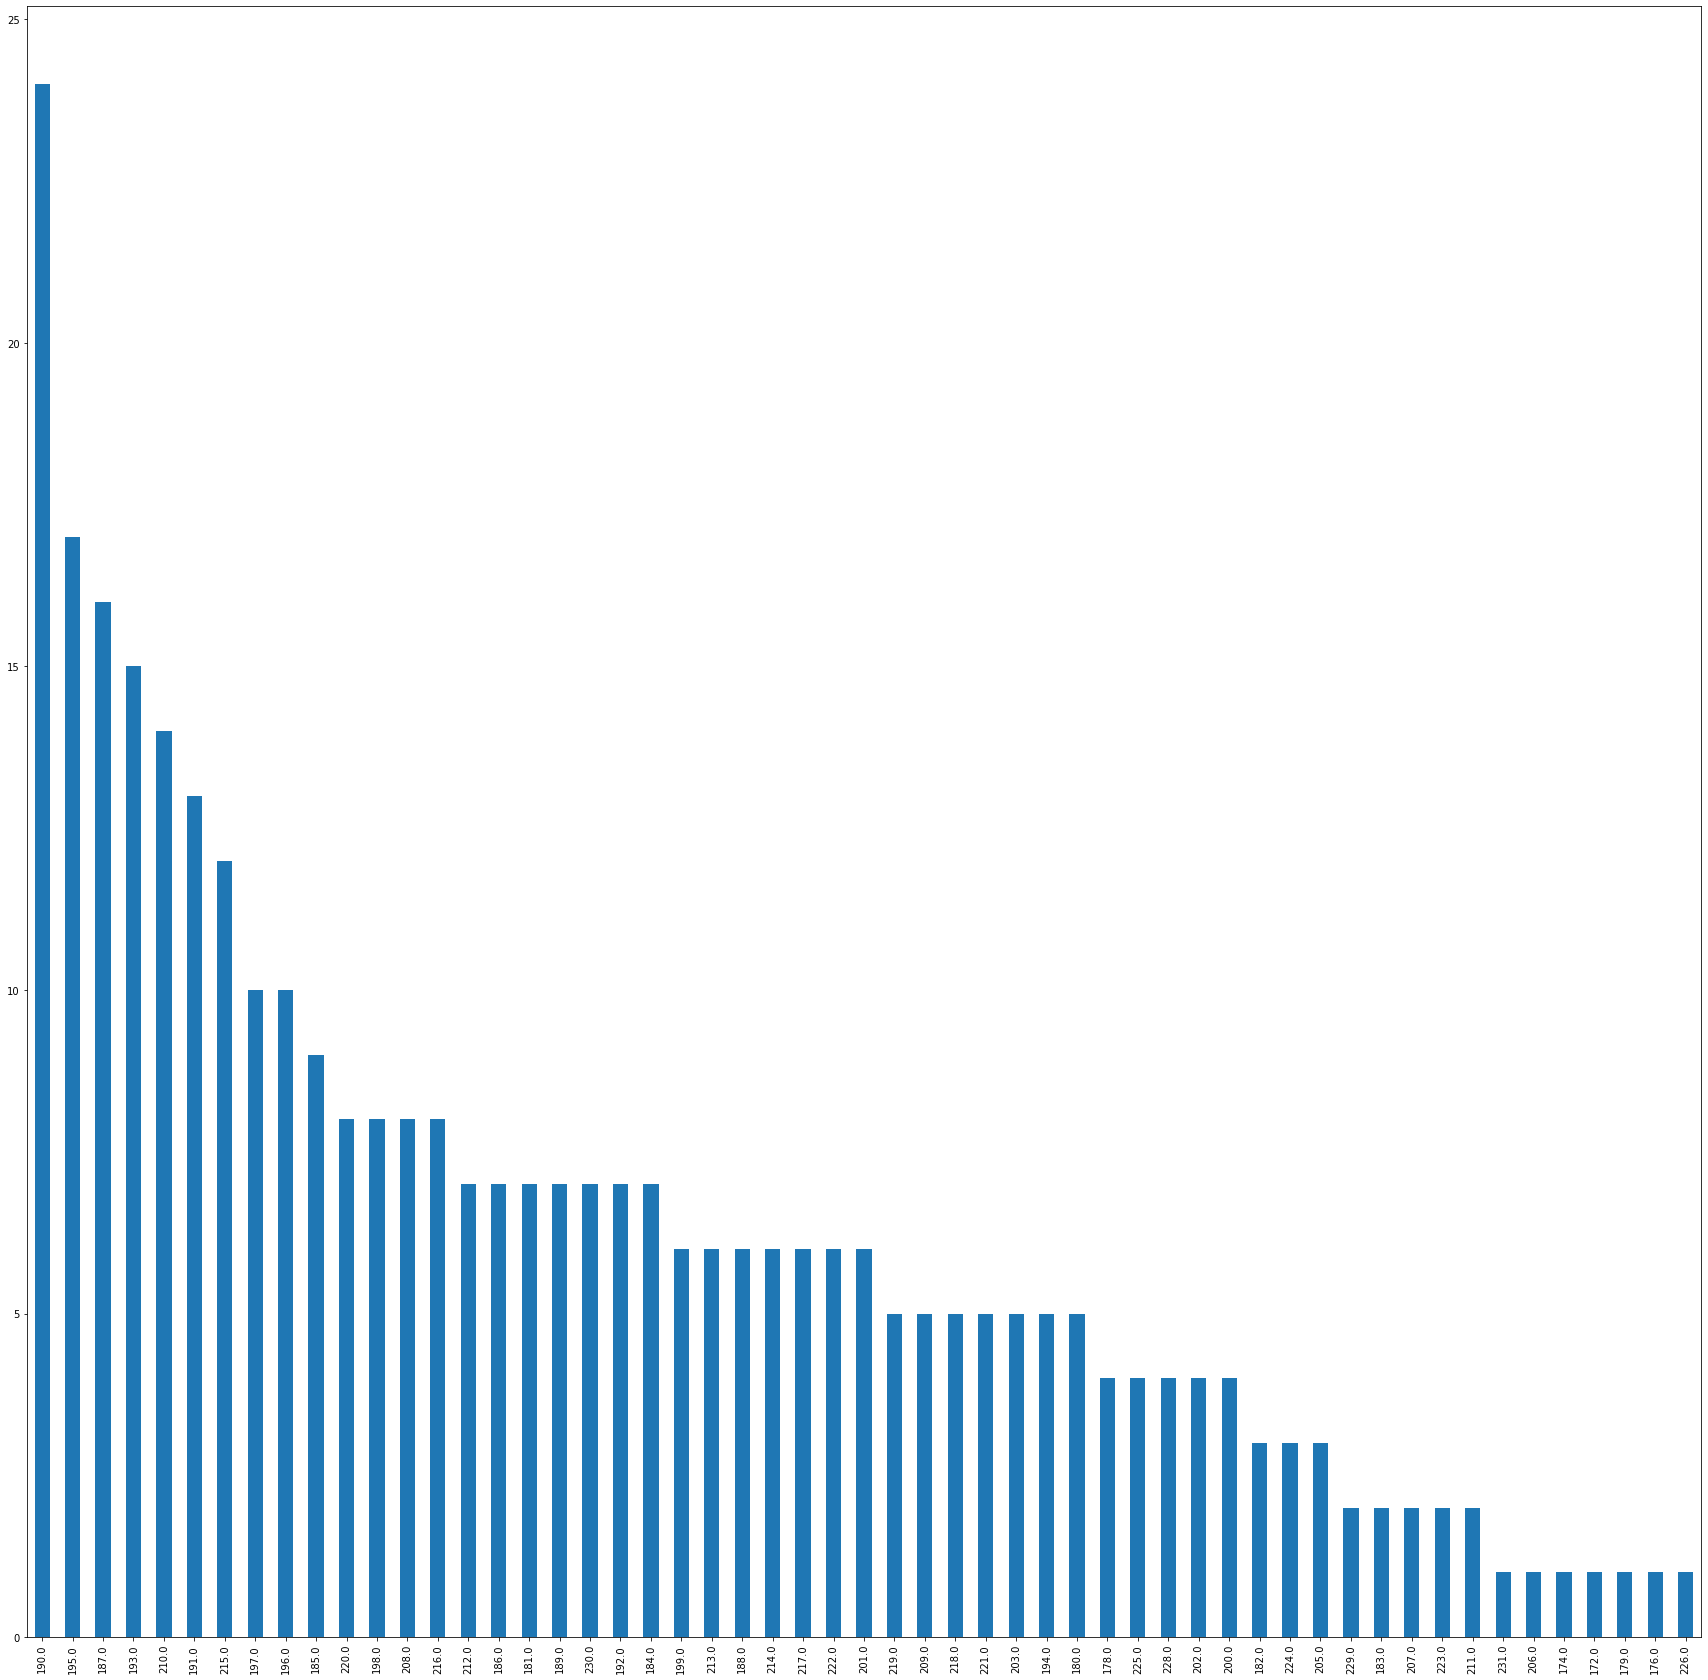

In [553]:
plt.figure(figsize=(30,30))
penguin_df['flipper_length_mm'].value_counts().plot(kind= 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


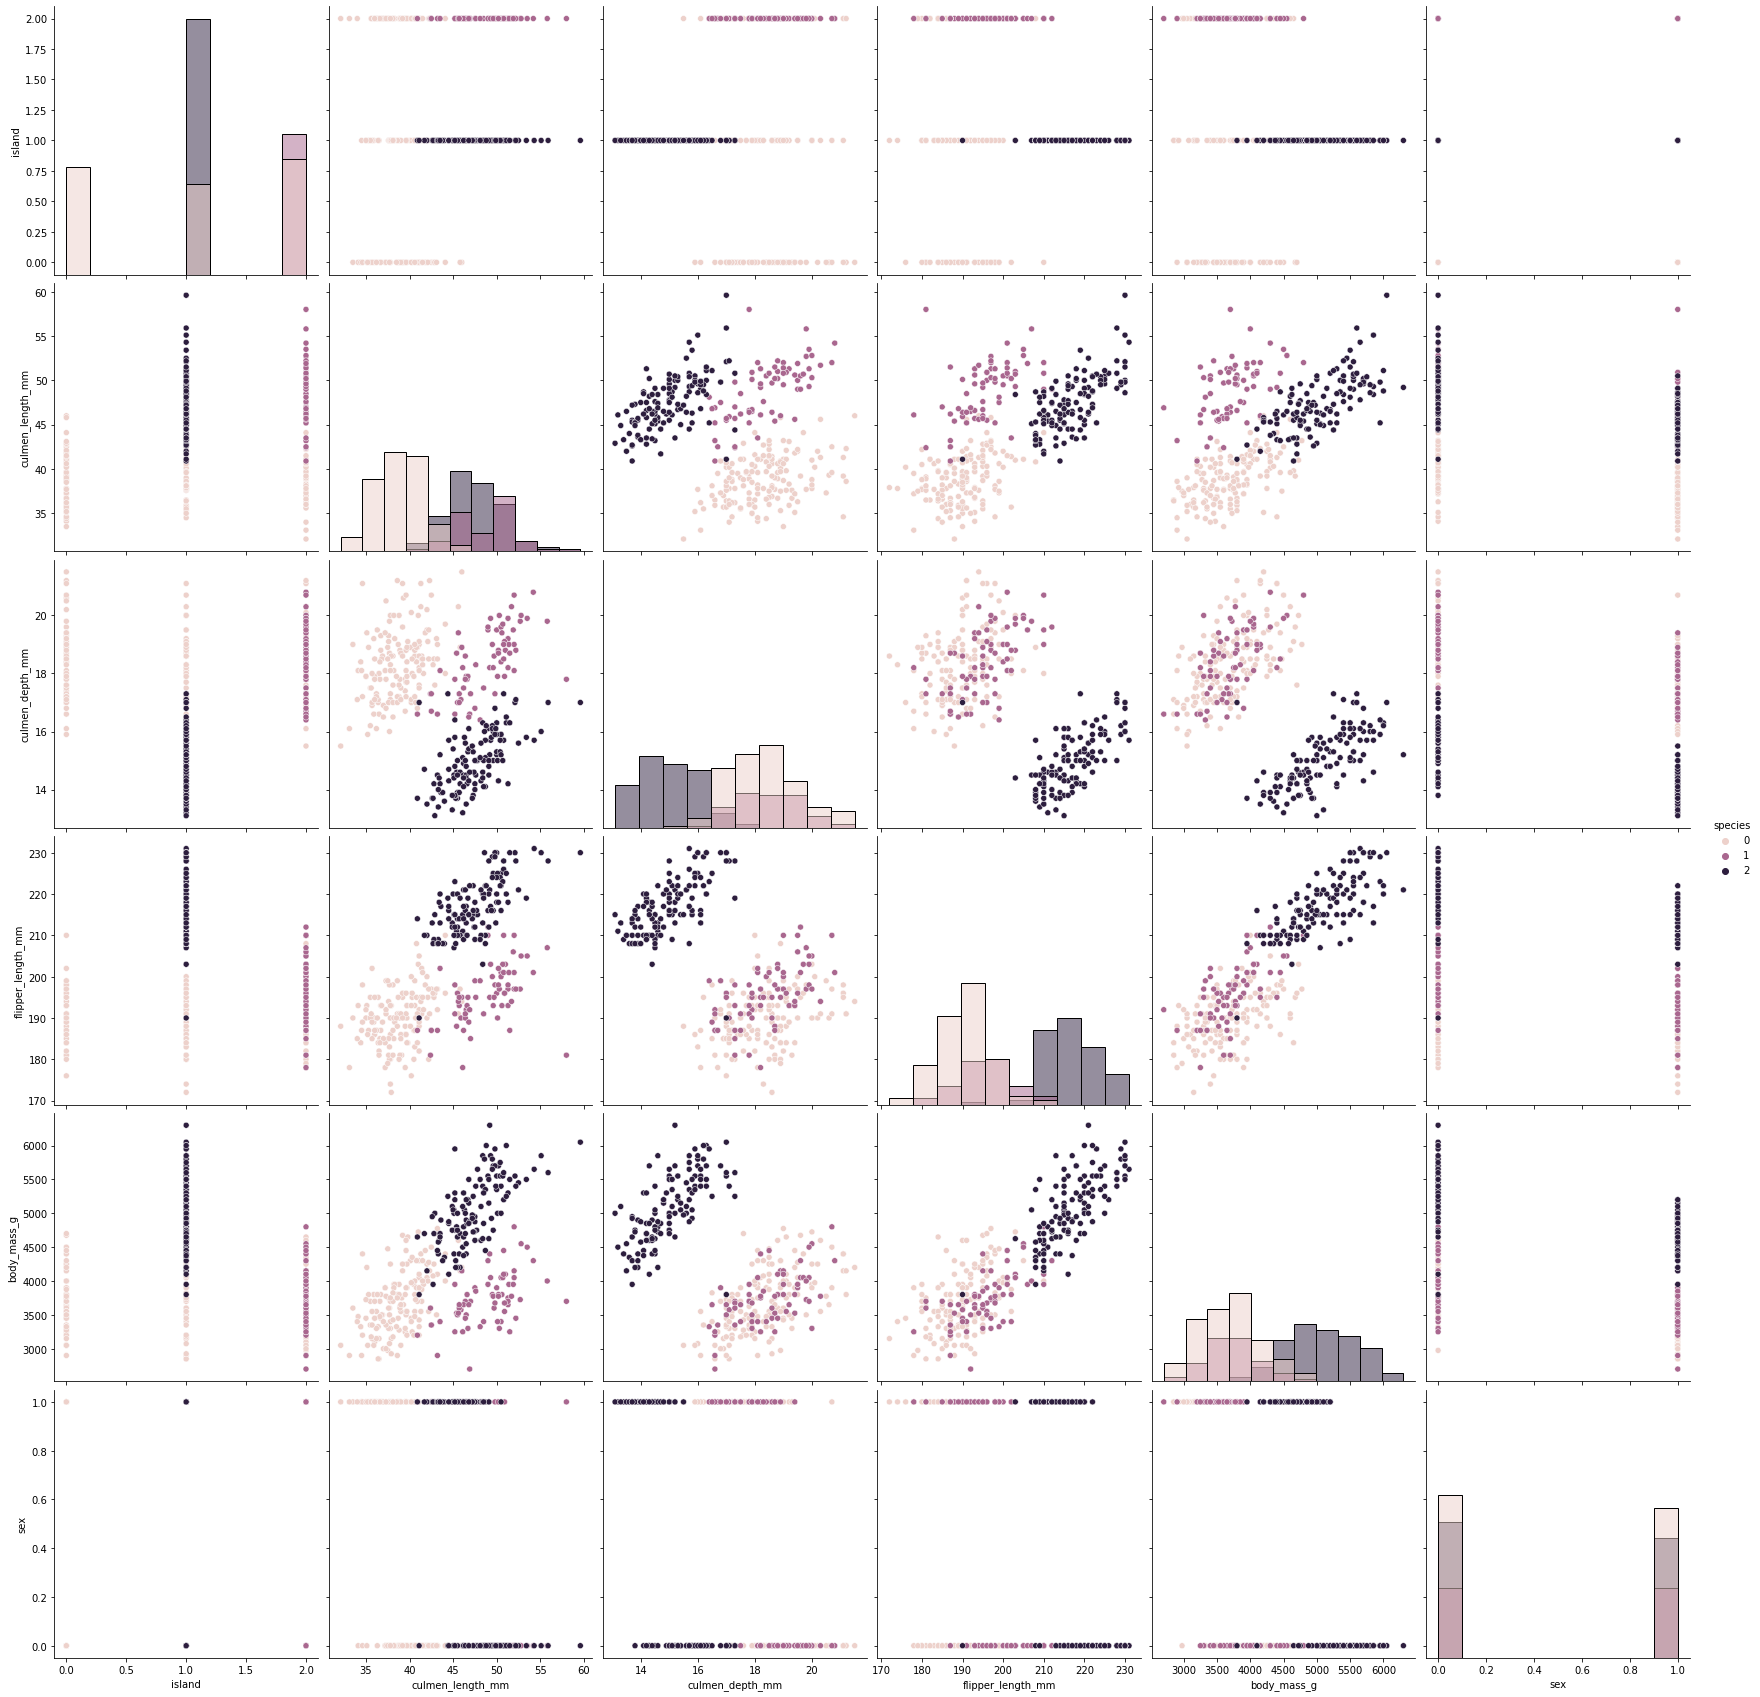

In [554]:
sns.pairplot(penguin_df, hue="species", size=4,diag_kind="hist")

Normalizing non-categorical features (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g)

In [555]:
non_categorical_df = penguin_df[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]]
non_categorical_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.905523,17.150291,200.851744,4199.418605
std,5.447882,1.969061,14.045266,800.197923
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Finding the min and max values of each column and scaling the values

In [556]:
def min_max_scaler(dataframe):
    for cols in dataframe.columns:
        minn = min(dataframe[cols]) 
        maxx = max(dataframe[cols])
        for i in range(len(dataframe[cols])):
            dataframe[cols][i] = (dataframe[cols][i] - minn) / (maxx - minn)
    return dataframe
non_categorical_df = min_max_scaler(non_categorical_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [557]:
non_categorical_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,0.429292,0.482177,0.489013,0.416505
std,0.198105,0.234412,0.238055,0.222277
min,0.000000,0.000000,0.000000,0.000000
25%,0.260909,0.297619,0.305085,0.236111
50%,0.441818,0.500000,0.423729,0.368056
75%,0.596364,0.666667,0.694915,0.569444
max,1.000000,1.000000,1.000000,1.000000


In [558]:
print(penguin_df.head())
print(non_categorical_df.head())

  species island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0       0      0              39.1             18.7              181.0   
1       0      0              39.5             17.4              186.0   
2       0      0              40.3             18.0              195.0   
3       0      0              41.1             17.0              190.0   
4       0      0              36.7             19.3              193.0   

   body_mass_g sex  
0       3750.0   0  
1       3800.0   1  
2       3250.0   1  
3       3800.0   0  
4       3450.0   1  
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0          0.254545         0.666667           0.152542     0.291667
1          0.269091         0.511905           0.237288     0.305556
2          0.298182         0.583333           0.389831     0.152778
3          0.327273         0.464286           0.305085     0.305556
4          0.167273         0.738095           0.355932     0.208333


In [559]:
noncat_cols = ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]
for i in noncat_cols:
    penguin_df[i] = non_categorical_df[i]

In [560]:
penguin_df["sex"].value_counts()

0    179
1    165
Name: sex, dtype: int64

In [599]:
Y = penguin_df.loc[:,"sex"]
X = penguin_df.drop("sex",axis=1)
xval = X.values
yval = Y.values
X_train, X_test = xval[:276], xval[276:]
y_train, y_test = yval[:276], yval[276:]

In [562]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(276, 6)
(68, 6)
(276,)
(68,)


In [563]:
class LogitRegression():

    def __init__(self,x,y,alpha,num_iter,weights):
        global bias
        self.x = x 
        self.y = y
        self.alpha = alpha
        self.num_iter = num_iter
        self.n = n
        self.weights = weights
        bias = np.random.uniform(0,1)
        
    def fit(self):

        n= len(self.x)
        loss =[]
        self.weights = np.array(self.weights).reshape(6,1)
        for i in range(self.num_iter):
           self.weights = self.weights - self.alpha*self.gradient_descent()
           loss.append(self.cost()[0])
        return self.weights,loss
        


    def val_pred(self):
        x= np.array(self.x)
        result = x@self.weights
        result =result+bias
        result = self.sigmoid(result)
        return result

    def pred(self):
        result = self.val_pred()
        result = list(map(lambda x: 0 if x[0]<0.5  else 1, result))
        return result


        
    def sigmoid(self,z):
        self.z = z
        result = 1/(1+np.e**(-self.z))
        return np.ndarray.tolist(result)

    def cost(self):
        N = len(self.x)
        h = np.array(self.val_pred())
        y=np.array(self.y)
        j_w = (-y@np.log(h))-((1-y)@np.log(1-h))
    

        return j_w

    def gradient_descent(self):
        N=len(self.x)
        y = np.array(self.y).reshape(276,1)
        pred = np.array(self.val_pred()).reshape(276,1)
        
        delta = pred - y
        dW = (np.transpose(self.x)@delta)/N
        return dW

In [617]:
m,n = X_train.shape
weight = np.random.randn(1,n)
lr = LogitRegression(x=X_train,y=y_train, alpha = 0.01, num_iter = 10000,weights=weight)
trained_weights,loss = lr.fit()
pred = lr.pred()



In [618]:
count =0
for i in range(len(pred)):
    if pred[i] == y_train[i]:
        count+=1
accuracy = count/276
print(accuracy*100)

75.0


In [619]:
trained_weights

array([[0.3549868530379999],
       [0.6384337474027506],
       [-0.4371722553347996],
       [-1.4868311325239696],
       [0.19729545182856445],
       [-2.41491084671798]], dtype=object)

In [ ]:
loss

In [620]:
test_lr = LogitRegression(x=X_test,y=y_test, alpha = 0.001, num_iter = 10000,weights=trained_weights)
result = test_lr.pred()


In [621]:
count =0
for i in range(len(result)):
    if result[i] == y_test[i]:
        count+=1
test_accuracy = count/len(y_test)
print(test_accuracy*100)
print(count)

86.76470588235294
59


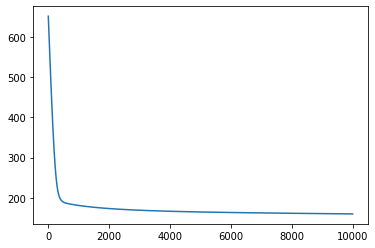

In [622]:
plt.plot(loss)

## Implementing the Linear Regression on the "flipper_length_mm"

In [571]:
Y = penguin_df.loc[:,"flipper_length_mm"]
X = penguin_df.drop("flipper_length_mm",axis=1)
xval = X.values
yval = Y.values
X_train, X_test = xval[:276], xval[276:]
y_train, y_test = yval[:276], yval[276:]

In [572]:
class LinearRegression():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def OLS(self):
        n = np.ones(len(self.x))
        x = self.x
        x = np.array(x)
        y = self.y
        y = np.array(y)
        x_len,x_width = x.shape
        x_mat =x
        if x_width ==1:
            x_mat = np.stack((n,x.self),axis = -1)
        x_trans = np.matrix.transpose(x_mat)
        z = np.linalg.inv(np.matmul(x_trans,x).astype('float32'))
        return np.matmul(z,np.matmul(x_trans,y))
    def MSE(self):
        N=len(self.y)
        result =[]
        weights = np.transpose(self.OLS())
        for i in self.x:
            result.append(np.matmul(weights,i))
        error = ((np.array(self.y)-np.array(result))**2).mean()
        return result



In [573]:
linr = LinearRegression(X_train,y_train)
pred = linr.MSE()
pred

[0.2991952975313547,
 0.32574691122030247,
 0.24571317869445325,
 0.2729154085279163,
 0.3050510135286417,
 0.3223659084863044,
 0.3042385158915354,
 0.47472965080653073,
 0.23743061343448635,
 0.41688891487688995,
 0.18868973298466046,
 0.26059208795194133,
 0.22924822142410978,
 0.3600155031674802,
 0.457372163530025,
 0.31573611793893774,
 0.2997757821913919,
 0.46998037954042227,
 0.2637595702821026,
 0.4378667772500169,
 0.2624718672805486,
 0.25944155267794516,
 0.3481203359448105,
 0.3063041711059901,
 0.26228842754137077,
 0.3414944447884637,
 0.25038171338265824,
 0.22160909764172285,
 0.22652996115480117,
 0.324336853371646,
 0.19065278889853726,
 0.28368144207457957,
 0.22226646813953935,
 0.3024414027043646,
 0.20804900373815727,
 0.3901704704640123,
 0.332964164399173,
 0.2807102657564213,
 0.25285044964682135,
 0.43300360168412577,
 0.19953264844918045,
 0.2918657868683458,
 0.20133496255587713,
 0.40555773107962845,
 0.15125548947740522,
 0.4181238933442634,
 0.224264728

The weights are Calculated using the OLS


In [574]:
lin_weight = linr.OLS()

In [575]:
result =[]
for i in X_test:
    result.append(np.matmul(lin_weight,i))
result

[0.6020959148972896,
 0.6993499168295332,
 0.639797458033046,
 0.8012873125530682,
 0.5838471862360354,
 0.7483784885463394,
 0.6200061575379984,
 0.8286554581905404,
 0.6771419724324711,
 0.8579314569754133,
 0.6278538781410046,
 0.862070432757622,
 0.675947157977116,
 0.7951289574879472,
 0.7034284718816426,
 0.7124458537784848,
 0.7303041479646128,
 0.7747501224906433,
 0.694291530970256,
 0.8573934297138208,
 0.6611018741566658,
 0.8988527855145527,
 0.676872958801675,
 0.8894309491687438,
 0.6724780553597381,
 0.7917692085244483,
 0.6906228871118311,
 0.7798614755851185,
 0.676717113437933,
 0.8520513868989814,
 0.6631814544714344,
 0.7362947253959391,
 0.7034312677142006,
 0.8379509053778289,
 0.7371710189798341,
 0.8147227543031825,
 0.6917619384994301,
 0.8345808662758197,
 0.7123751429098754,
 0.7506827632636738,
 0.7055213578657222,
 0.7157479778444423,
 0.670009682701386,
 0.7761380874395549,
 0.7207672815219642,
 0.8483865576537317,
 0.7517696464984494,
 0.7858361712128187,

In [576]:
r=np.array(linr.OLS())
r = r.reshape(1,6)
r.shape


(1, 6)

In [577]:
m = X_train@np.transpose(r)
m.shape

(276, 1)

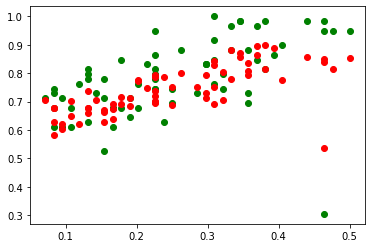

In [578]:
import matplotlib.pyplot as plt

x = penguin_df.loc[:,"culmen_depth_mm"]
x=x.values
x=x[276:]
plt.scatter(x,y_test,c="green")
plt.scatter(x,result,c="red")
# plt.legend("actual","predicted")

##Implementing the Ridgeregression extending the Part3

In [579]:
class RidgeRegression():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def OLS(self):
        n = np.ones(len(self.x))

        x = self.x
        x = np.array(x)
        y = self.y
        y = np.array(y)
        x_len,x_width = x.shape
        x_mat =x
        if x_width ==1:
            x_mat = np.stack((n,x.self),axis = -1)
        x_trans = np.matrix.transpose(x_mat)
        lam = np.identity(6)
        inter =np.matmul(x_trans,x)+lam
        z = np.linalg.inv(inter.astype('float32'))
        return np.matmul(z,np.matmul(x_trans,y))
    def MSE(self):
        N=len(self.y)
        result =[]
        weights = np.transpose(self.OLS())
        for i in self.x:
            result.append(np.matmul(weights,i))
        error = ((np.array(self.y)-np.array(result))**2).mean()
        return error,result

In [580]:
ridr = RidgeRegression(X_train,y_train)
ridr_error,ridr_result = ridr.MSE()
ridr_result

[0.29587178352381444,
 0.3151660649582463,
 0.2481536912839482,
 0.2654316542559213,
 0.304737014136949,
 0.3259162310460486,
 0.2978549545044189,
 0.45507085437956435,
 0.23540767986418196,
 0.40882909542086726,
 0.189722216944354,
 0.25406407595075403,
 0.23213507338284253,
 0.36165911496569825,
 0.444482237369477,
 0.306580264526932,
 0.2998084199959366,
 0.45840669323914496,
 0.26245391114598515,
 0.43625686945964637,
 0.2600048377186915,
 0.2571090117420185,
 0.3388008057300094,
 0.29569319176587316,
 0.2527794784211025,
 0.3310961107610531,
 0.2503966854413752,
 0.22365272583584853,
 0.22990536206329315,
 0.3169864567777927,
 0.18687706528812095,
 0.27226563445135327,
 0.2202326661308556,
 0.29505372298601185,
 0.20181224675685133,
 0.3823119648707524,
 0.32616708854463794,
 0.2768686432195781,
 0.25352425864605044,
 0.4103995049087011,
 0.19937666069710108,
 0.28317352268332163,
 0.20316216133108495,
 0.3918485561378736,
 0.15164680336599407,
 0.39566784135870925,
 0.22680837498

In [581]:
ridr_error

0.009412904430244465

In [582]:
ridr_weights = ridr.OLS()

In [583]:
print(ridr_weights)

[0.15284325356185624 -0.01490576521074534 0.029362604910945
 0.19779357685790766 0.5366923931594774 0.04202403868745974]


In [584]:
ridge_result =[]
for i in X_test:
    ridge_result.append(np.matmul(lin_weight,i))
ridge_result

[0.6020959148972896,
 0.6993499168295332,
 0.639797458033046,
 0.8012873125530682,
 0.5838471862360354,
 0.7483784885463394,
 0.6200061575379984,
 0.8286554581905404,
 0.6771419724324711,
 0.8579314569754133,
 0.6278538781410046,
 0.862070432757622,
 0.675947157977116,
 0.7951289574879472,
 0.7034284718816426,
 0.7124458537784848,
 0.7303041479646128,
 0.7747501224906433,
 0.694291530970256,
 0.8573934297138208,
 0.6611018741566658,
 0.8988527855145527,
 0.676872958801675,
 0.8894309491687438,
 0.6724780553597381,
 0.7917692085244483,
 0.6906228871118311,
 0.7798614755851185,
 0.676717113437933,
 0.8520513868989814,
 0.6631814544714344,
 0.7362947253959391,
 0.7034312677142006,
 0.8379509053778289,
 0.7371710189798341,
 0.8147227543031825,
 0.6917619384994301,
 0.8345808662758197,
 0.7123751429098754,
 0.7506827632636738,
 0.7055213578657222,
 0.7157479778444423,
 0.670009682701386,
 0.7761380874395549,
 0.7207672815219642,
 0.8483865576537317,
 0.7517696464984494,
 0.7858361712128187,

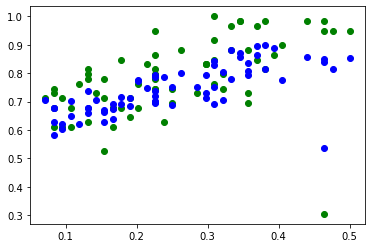

In [585]:
plt.scatter(x,y_test,c="green")
plt.scatter(x,ridge_result,c="blue")
# plt.legend("actual","predicted")

## References used are:
## Geeks for Geeks
## W3 Schools
## Numpy Documentary
## Stack Overflow
## Pandas Documentary